# Capstone Two: EDA <a id='Capstone Two: EDA'></a>

## Imports<a id='Imports'></a>

In [1]:
#Import liberies needed for the capstone
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load The Car Data From Data Wrangling <a id='Load The Car Data From Data Wrangling'></a>

In [2]:
car_data = pd.read_csv('car_data.csv')
car_data.head()

,Unnamed: 0,Price,Year,Mileage,City,State,Vin,Make,Model,Duplicated
0,0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed,False
1,1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed,False
2,2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed,False
3,3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed,False
4,4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic,False


In [3]:
car_data.drop('Duplicated',axis=1, inplace=True)
car_data.drop(car_data.columns[[0]],axis=1, inplace=True)
car_data

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
...,...,...,...,...,...,...,...,...
852087,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
852088,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
852089,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD
852090,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90


In [4]:
car_data.shape

(852092, 8)

In [5]:
car_data.dtypes

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Vin        object
Make       object
Model      object
dtype: object

In [6]:
car_data.columns

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model'], dtype='object')

#### Adding Age column

In [7]:
car_data['Age'] = pd.datetime.now().year - car_data['Year']
car_data.head()

/var/folders/kp/98k1k1ln0nq8s1cwdk0882q80000gn/T/ipykernel_29741/3643293869.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  car_data['Age'] = pd.datetime.now().year - car_data['Year']


,Price,Year,Mileage,City,State,Vin,Make,Model,Age
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed,8
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed,9
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed,9
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed,8
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic,6


## Average car price per year

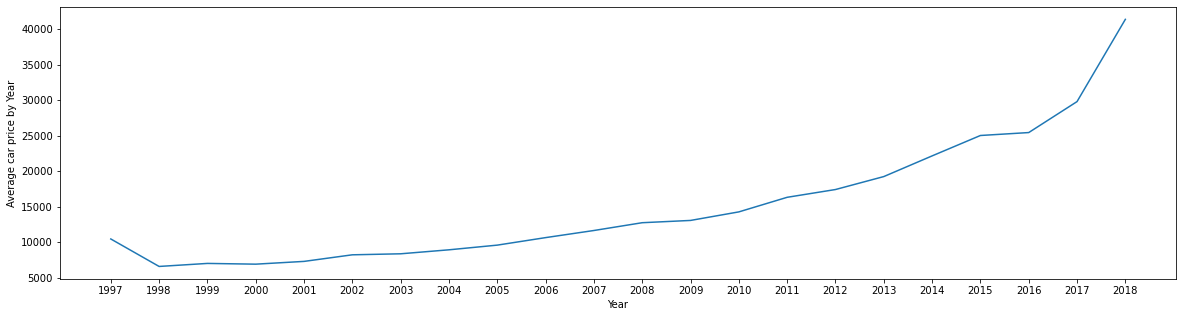

In [8]:
acpy=car_data.groupby(by='Year')['Price'].mean()
acpy=pd.DataFrame(acpy)
acpy=acpy.reset_index()
ar=np.array(acpy['Year'])
plt.figure(figsize=(20,5))
_ =sns.lineplot(data=acpy,x='Year',y='Price')
_ =plt.xticks(ar)
_ =plt.ylabel('Average car price by Year')
plt.show()

## Top 5 highest car models

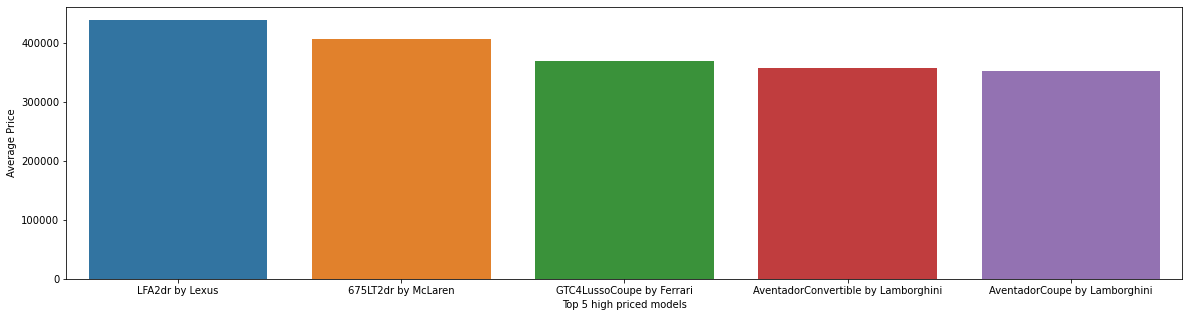

In [9]:
t5h=car_data.groupby(by=['Make','Model'])['Price'].mean()
t5h=pd.DataFrame(t5h).reset_index()
t5h=t5h.sort_values(by='Price',ascending=False).head(5)
t5h['Connect']=t5h['Model'].str.cat(t5h['Make'], sep=' by ')
plt.figure(figsize=(20,5))
_=sns.barplot(data=t5h,x='Connect', y='Price')
_=plt.xlabel('Top 5 high priced models')
_=plt.ylabel('Average Price')
plt.show()

## Which column correlates most with the price?

            Price      Year   Mileage       Age
Price    1.000000  0.401258 -0.421242 -0.401258
Year     0.401258  1.000000 -0.764849 -1.000000
Mileage -0.421242 -0.764849  1.000000  0.764849
Age     -0.401258 -1.000000  0.764849  1.000000


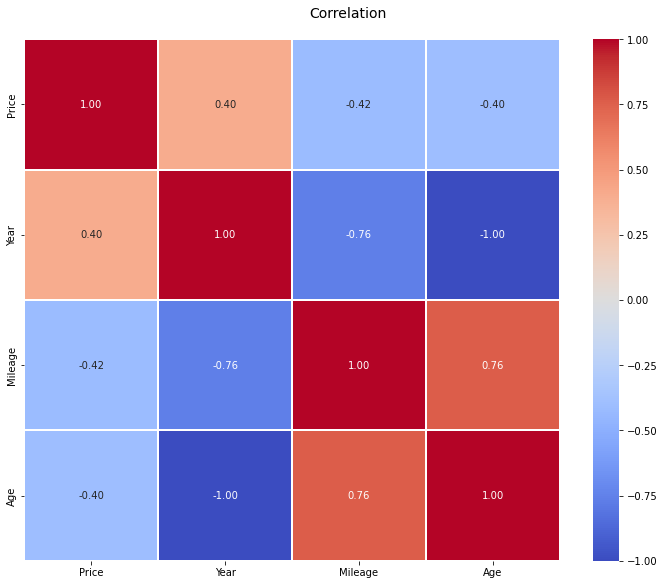

In [10]:
cr = car_data.corr()
print(cr)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(cr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation', fontsize=14)

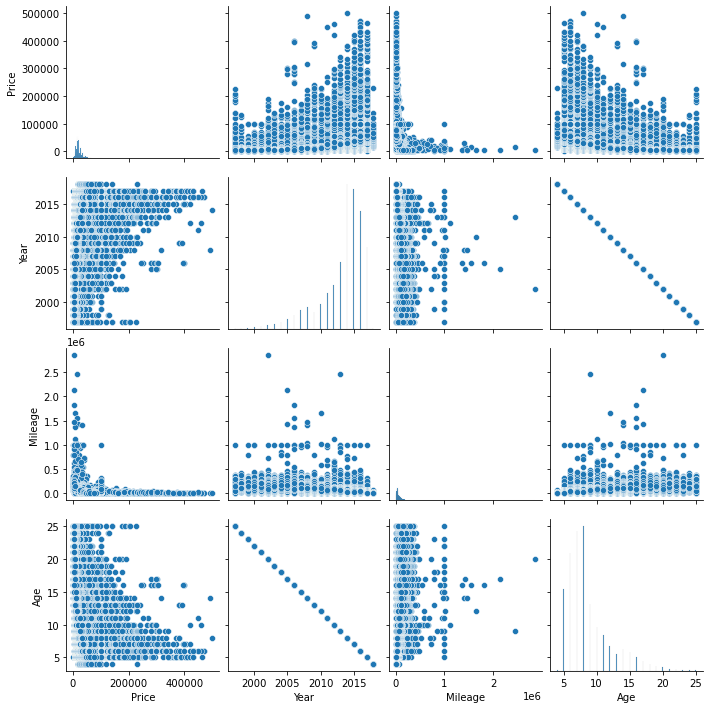

In [11]:
sns.pairplot(car_data)

## State with most used car sold

In [12]:
car_data['State'] = car_data['State'].str.upper()

State
 TX    94646
 CA    80467
 FL    73310
 GA    39622
 IL    38680
dtype: int64


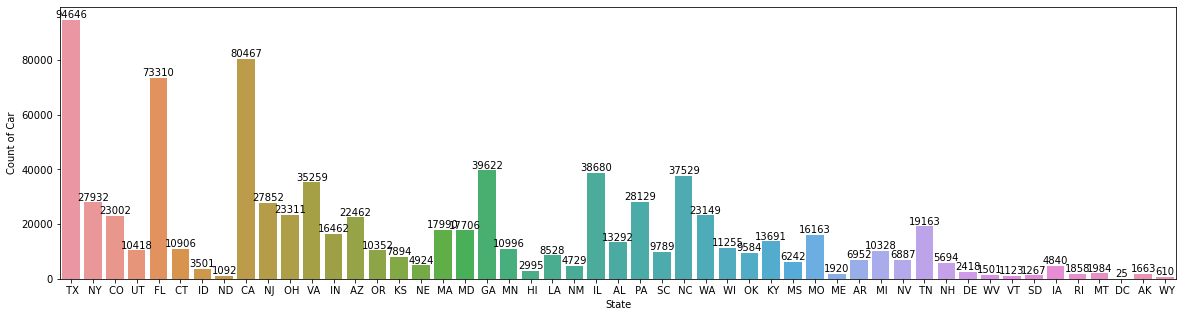

In [31]:
smc=car_data.groupby('State').size().sort_values(ascending=False).head()
print(smc)
plt.figure(figsize=(20,5))
_=sns.countplot(data=car_data,x='State')
_=plt.bar_label(_.containers[0])
plt.ylabel('Count of Car')
plt.show()

## What year has most used cars?

Year
2014    162424
2015    157513
2016    132128
2017     91603
2013     74697
dtype: int64


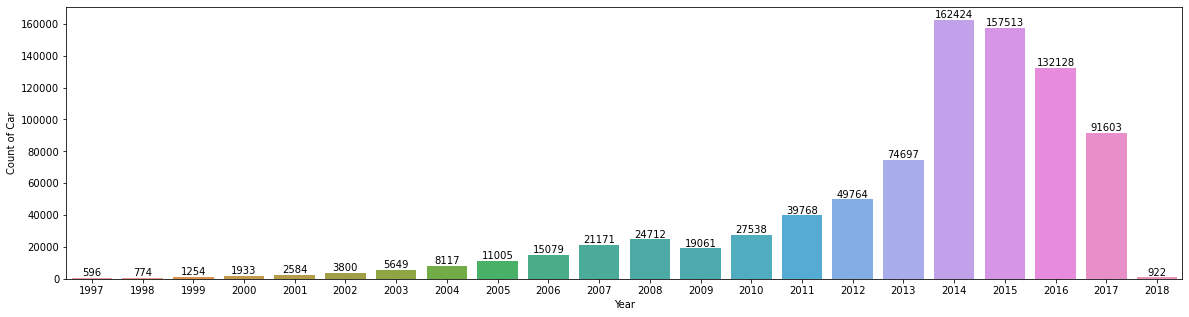

In [30]:
ymc = car_data.groupby('Year').size().sort_values(ascending=False).head()
print(ymc)
plt.figure(figsize=(20,5))
_=sns.countplot(data=car_data,x='Year')
_=plt.bar_label(_.containers[0])
_=plt.ylabel('Count of Car')
plt.show()

## Saving the file

In [32]:
car_data.to_csv('car_dataeda.csv')